# 📈 Calculus for Deep Learning
A complete, clean, and fully working educational notebook.
Covers derivatives, chain rule, gradients, gradient descent, and backpropagation.


## ⚙️ Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.style.use('seaborn-v0_8-whitegrid')
np.random.seed(42)

print("Setup complete ✅")

Setup complete ✅


## 1️⃣ Derivatives: Numerical vs Analytical

In [2]:
def numerical_derivative(f, x, h=1e-5):
    return (f(x+h) - f(x-h)) / (2*h)

def f(x):
    return x**2

def analytical_derivative(x):
    return 2*x

x_test = 3.0
print("Numerical:", numerical_derivative(f, x_test))
print("Analytical:", analytical_derivative(x_test))

Numerical: 6.000000000039306
Analytical: 6.0


## 2️⃣ Chain Rule Example

In [3]:
def g(x):
    return 3*x + 2

def y(x):
    return g(x)**2

def dy_dx_chain(x):
    return 2*g(x) * 3

x_test = 2.0
print("Chain rule result:", dy_dx_chain(x_test))

Chain rule result: 48.0


## 3️⃣ Gradient & Loss Surface Visualization

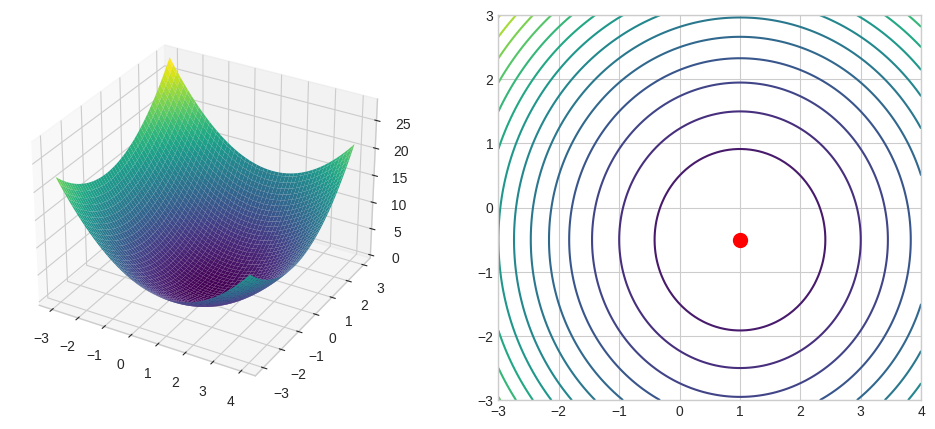

In [4]:
def loss(w1, w2):
    return (w1 - 1)**2 + (w2 + 0.5)**2

def loss_gradient(w1, w2):
    return np.array([2*(w1-1), 2*(w2+0.5)])

w1_range = np.linspace(-3, 4, 100)
w2_range = np.linspace(-3, 3, 100)
W1, W2 = np.meshgrid(w1_range, w2_range)
L = loss(W1, W2)

fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(W1, W2, L, cmap='viridis')

ax2 = fig.add_subplot(122)
ax2.contour(W1, W2, L, levels=15, cmap='viridis')
ax2.scatter([1], [-0.5], color='red', s=100)
plt.show()

## 4️⃣ Gradient Descent Implementation

In [5]:
def gradient_descent(loss_fn, grad_fn, initial, lr, steps):
    w = np.array(initial, dtype=float)
    history = [(w.copy(), loss_fn(*w))]
    for _ in range(steps):
        grad = grad_fn(*w)
        w = w - lr * grad
        history.append((w.copy(), loss_fn(*w)))
    return history

history = gradient_descent(loss, loss_gradient, [-1.5, 1.5], 0.1, 30)
print("Final weights:", history[-1][0])

Final weights: [ 0.99690515 -0.49752412]


## 5️⃣ Learning Rate Effects

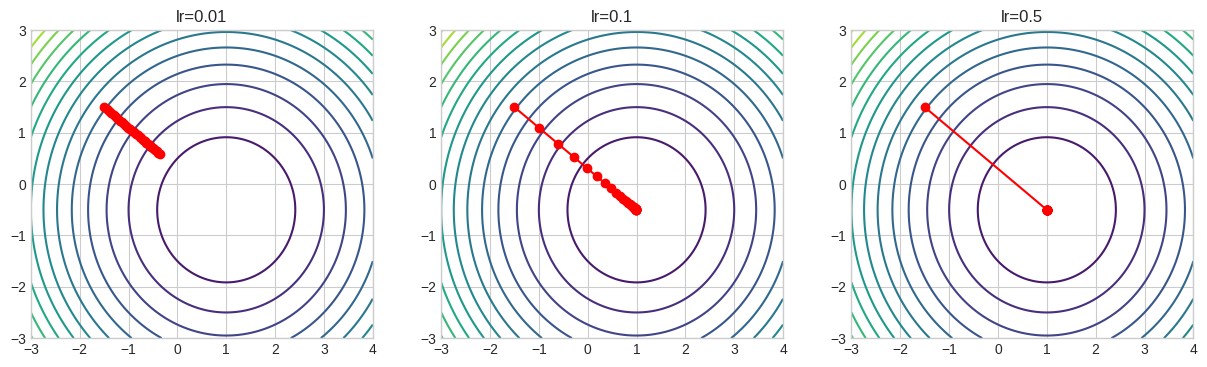

In [6]:
fig, axes = plt.subplots(1,3, figsize=(15,4))
learning_rates = [0.01, 0.1, 0.5]

for ax, lr in zip(axes, learning_rates):
    history = gradient_descent(loss, loss_gradient, [-1.5,1.5], lr, 30)
    path = np.array([h[0] for h in history])
    ax.contour(W1, W2, L, levels=15, cmap='viridis')
    ax.plot(path[:,0], path[:,1], 'ro-')
    ax.set_title(f"lr={lr}")
plt.show()

## 6️⃣ Backpropagation: XOR Neural Network

In [7]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(a):
    return a*(1-a)

class NeuralNetwork:
    def __init__(self):
        self.W1 = np.random.randn(2,4)*0.5
        self.b1 = np.zeros((1,4))
        self.W2 = np.random.randn(4,1)*0.5
        self.b2 = np.zeros((1,1))

    def forward(self, X):
        self.X = X
        self.z1 = X @ self.W1 + self.b1
        self.a1 = sigmoid(self.z1)
        self.z2 = self.a1 @ self.W2 + self.b2
        self.a2 = sigmoid(self.z2)
        return self.a2

    def backward(self, y, lr=1.0):
        m = y.shape[0]
        dL_da2 = 2*(self.a2 - y)
        dz2 = dL_da2 * sigmoid_derivative(self.a2)
        dW2 = self.a1.T @ dz2 / m
        db2 = np.sum(dz2, axis=0, keepdims=True)/m
        da1 = dz2 @ self.W2.T
        dz1 = da1 * sigmoid_derivative(self.a1)
        dW1 = self.X.T @ dz1 / m
        db1 = np.sum(dz1, axis=0, keepdims=True)/m
        self.W2 -= lr*dW2
        self.b2 -= lr*db2
        self.W1 -= lr*dW1
        self.b1 -= lr*db1
        return np.mean((self.a2 - y)**2)

nn = NeuralNetwork()
losses = []
for epoch in range(5000):
    nn.forward(X)
    loss_value = nn.backward(y, lr=1.0)
    losses.append(loss_value)

print("Training complete!")

Training complete!


## 7️⃣ XOR Visualization

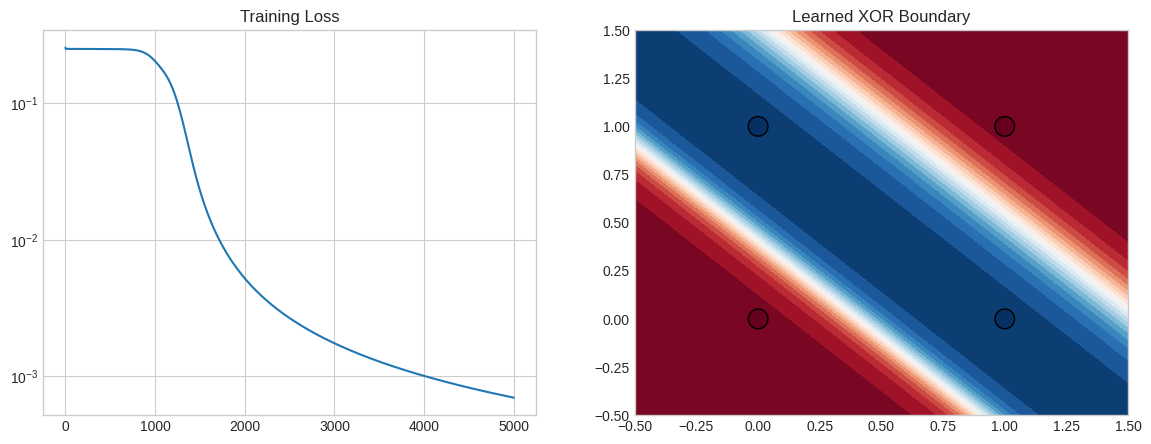

In [8]:
fig, axes = plt.subplots(1,2, figsize=(14,5))

axes[0].plot(losses)
axes[0].set_yscale("log")
axes[0].set_title("Training Loss")

xx, yy = np.meshgrid(np.linspace(-0.5,1.5,200),
                     np.linspace(-0.5,1.5,200))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = nn.forward(grid).reshape(xx.shape)

axes[1].contourf(xx, yy, Z, levels=20, cmap='RdBu')
axes[1].scatter(X[:,0], X[:,1], c=y.ravel(), cmap='RdBu', s=200, edgecolors='black')
axes[1].set_title("Learned XOR Boundary")

plt.show()